In [16]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers

In [17]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()


In [18]:

import os
import shutil
import random

original_dataset_dir ="/kaggle/input/flowers-recognition/flowers"

base_dir = "/kaggle/working/flowers3"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for cls in classes:
    cls_dir = os.path.join(original_dataset_dir, cls)
    files = os.listdir(cls_dir)
    random.shuffle(files)

    split_point = int(0.7 * len(files))
    train_files = files[:split_point]
    validation_files = files[split_point:]

    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir)
    

    validation_cls_dir = os.path.join(validation_dir, cls)
    os.makedirs(validation_cls_dir)

    
    for file in train_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(train_cls_dir, file)
        shutil.copyfile(src, dst)

    for file in validation_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(validation_cls_dir, file)
        shutil.copyfile(src, dst)

In [19]:
training_dir="/kaggle/working/flowers3/train"
validation_dir="/kaggle/working/flowers3/validation"

def prep_data(augmented,batch_size=16):    
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
    
        validation_datagen = ImageDataGenerator(rescale=1./255)    

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,
        class_mode="sparse")
         
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,
        class_mode="sparse")
             
    return train_set , validation_set

In [20]:
# augmented train dataset
augmented_train_set,validation_set=prep_data(True)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [21]:
# not augmented train set
straight_train_set,validation_set=prep_data(False)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [22]:
import os
import matplotlib.pyplot as plt 

train_dir = training_dir
validation_dir = validation_dir

train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'rose': 548, 'tulip': 688, 'dandelion': 736, 'sunflower': 513, 'daisy': 534}
Validation set Distribution:
{'rose': 236, 'tulip': 296, 'dandelion': 316, 'sunflower': 220, 'daisy': 230}


In [26]:
# not augmented dataset
images,labels=straight_train_set.next()

class_names = straight_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

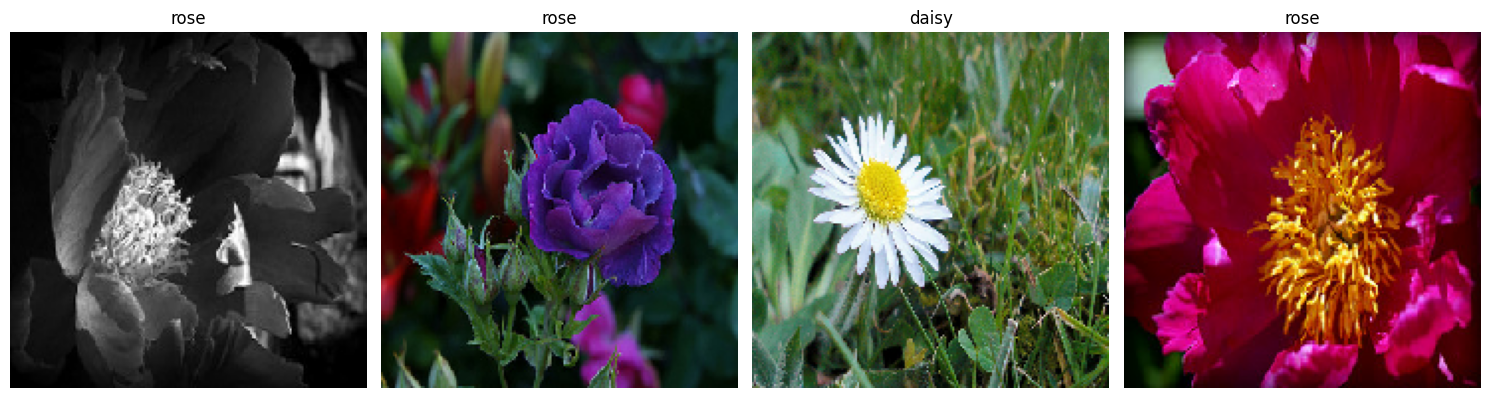

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [28]:
# augmented dataset
images,labels=augmented_train_set.next()

class_names = augmented_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

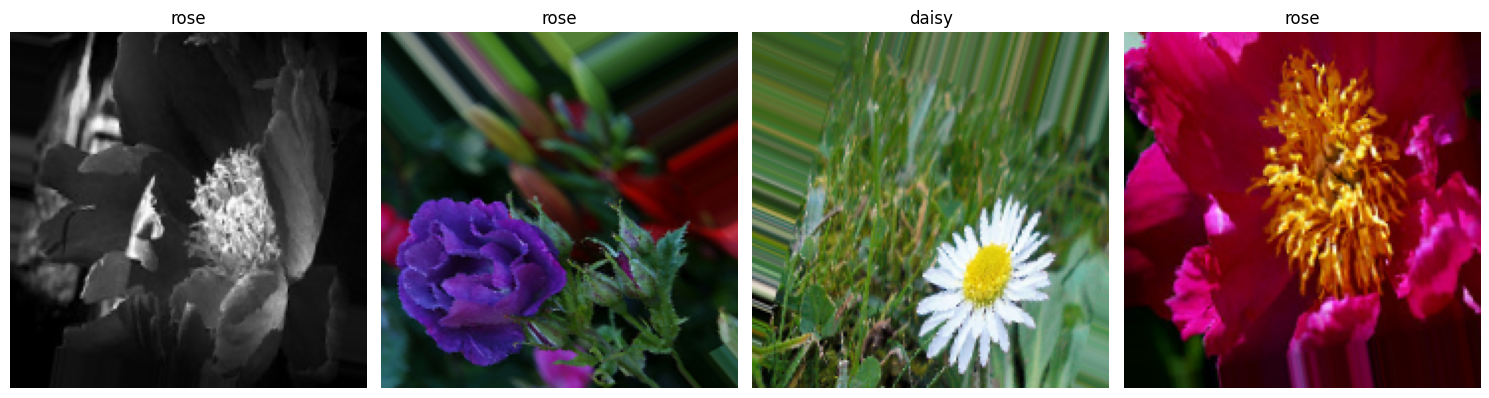

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [58]:
train_set,validation_set=prep_data(True) # create datasets ( augmented)

Found 3019 images belonging to 5 classes.

Found 1298 images belonging to 5 classes.


In [59]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_9"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_46 (Conv2D)          (None, 178, 178, 32)      896       

                                                                 

 max_pooling2d_37 (MaxPoolin  (None, 89, 89, 32)       0         

 g2D)                                                            

                                                                 

 conv2d_47 (Conv2D)          (None, 87, 87, 64)        18496     

                                                                 

 max_pooling2d_38 (MaxPoolin  (None, 43, 43, 64)       0         

 g2D)                                                            

                                                                 

 conv2d_48 (Conv2D)          (None, 41, 41, 128)       73856     

                                                                 

 max_pooling2d_39 (MaxPoolin  (None, 2

In [60]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [61]:
history1_6 = model.fit(
    train_set,
    epochs=75,
    validation_data=validation_set,)

Epoch 1/75

189/189 [==============================] - 22s 109ms/step - loss: 1.5035 - accuracy: 0.3157 - val_loss: 1.2798 - val_accuracy: 0.4299

Epoch 2/75

189/189 [==============================] - 20s 107ms/step - loss: 1.2875 - accuracy: 0.4313 - val_loss: 1.1934 - val_accuracy: 0.4784

Epoch 3/75

189/189 [==============================] - 20s 108ms/step - loss: 1.2218 - accuracy: 0.4747 - val_loss: 1.1555 - val_accuracy: 0.5031

Epoch 4/75

189/189 [==============================] - 20s 108ms/step - loss: 1.1700 - accuracy: 0.5031 - val_loss: 1.0789 - val_accuracy: 0.5308

Epoch 5/75

189/189 [==============================] - 21s 110ms/step - loss: 1.1425 - accuracy: 0.5237 - val_loss: 1.0635 - val_accuracy: 0.5516

Epoch 6/75

189/189 [==============================] - 20s 107ms/step - loss: 1.0986 - accuracy: 0.5422 - val_loss: 1.0658 - val_accuracy: 0.5639

Epoch 7/75

189/189 [==============================] - 20s 106ms/step - loss: 1.0755 - accuracy: 0.5598 - val_loss: 1.

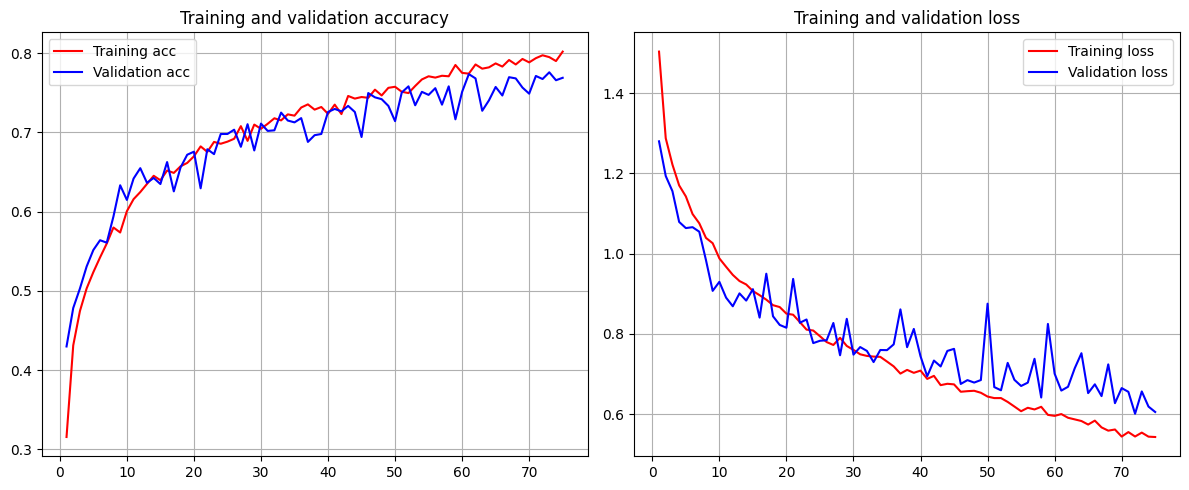

In [62]:
visualize(history1_6)